In [95]:
import pandas as pd
import numpy as np
df = pd.read_csv('./results/calibration_image_data.csv', sep=',',decimal='.')
df.head()

,img_num,target_aruco,img_name,carriage_x_dist,carriage_y_dist,carriage_x_undist,carriage_y_undist,carriage_x_dist_warp,carriage_y_dist_warp,carriage_x_undist_warp,...,target_x_undist_warp,target_y_undist_warp,angle_dist,angle_undist,angle_dist_warp,angle_undist_warp,aruco_flipper_76_x,aruco_flipper_76_y,aruco_flipper_77_x,aruco_flipper_77_y
0,1,13,img_1,544.5,992.5,546.5,978.5,400.31912,562.67110,402.40564,...,1068.4825,534.40424,134.681033,134.808648,134.275360,134.402390,779.0,1217.5,863.0,1133.5
1,2,13,img_2,766.5,1279.0,771.0,1264.0,628.63520,853.44150,632.79670,...,1068.4825,534.40424,99.134418,98.913519,98.618782,98.408852,1029.0,1398.0,1050.0,1265.0
2,3,13,img_3,1098.0,1389.0,1101.5,1373.5,965.78076,963.85480,968.40430,...,1068.4825,534.40424,67.917349,67.710103,67.531914,67.325142,1321.0,1409.0,1265.0,1273.0
3,4,13,img_4,1514.0,1196.5,1514.0,1184.5,1384.80680,766.92880,1383.43700,...,1068.4825,534.40424,28.012126,27.993991,27.869619,27.826616,1049.0,855.5,741.5,691.5
4,5,13,img_5,1514.5,398.5,1511.5,394.0,1378.65440,-43.00896,1374.41130,...,1068.4825,534.40424,-47.809649,-47.588874,-48.229115,-48.007038,741.5,1266.0,848.0,1149.0


In [154]:
x = df[['target_x_undist', 'target_y_undist','angle_undist','aruco_flipper_76_x',	'aruco_flipper_76_y']]
y = df[['carriage_x_undist','carriage_y_undist']]

In [155]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2)

# Linear regressor

In [156]:
from sklearn import linear_model
model=linear_model.LinearRegression()
model.fit(x_train,y_train)

y_pred=model.predict(x_test)

In [157]:
from sklearn.metrics import r2_score, mean_squared_error
print(mean_squared_error(y_test,y_pred,squared=True),r2_score(y_test,y_pred))

83925.44929225072 0.9108259190257401


Text(0.5, 1.0, 'actual vs predicted')

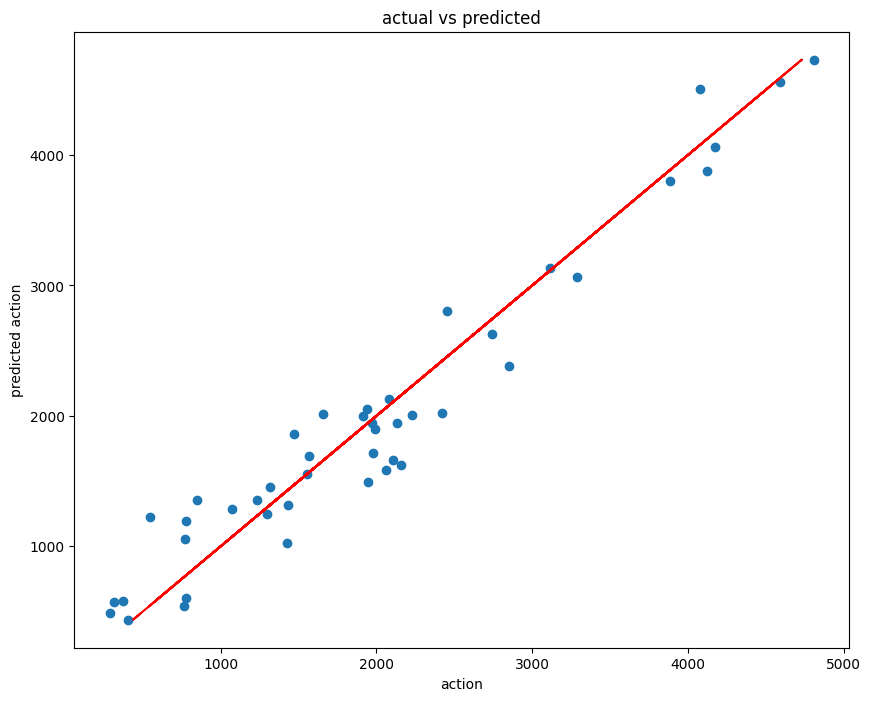

In [158]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
plt.scatter(y_test,y_pred)
plt.plot(y_pred, y_pred, color = 'red')
plt.xlabel('action')
plt.ylabel('predicted action')
plt.title('actual vs predicted')

# polynomic regressor

In [159]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
x_poly_train=poly.fit_transform(x_train)
x_poly_test=poly.fit_transform(x_test)

In [160]:
model=linear_model.LinearRegression()
model.fit(x_poly_train,y_train)
y_pred=model.predict(x_poly_test)

In [161]:
from sklearn.metrics import r2_score, mean_squared_error
print(mean_squared_error(y_test,y_pred,squared=False),r2_score(y_test,y_pred))

85.73768416214044 0.9931699935303278


Text(0.5, 1.0, 'actual vs predicted')

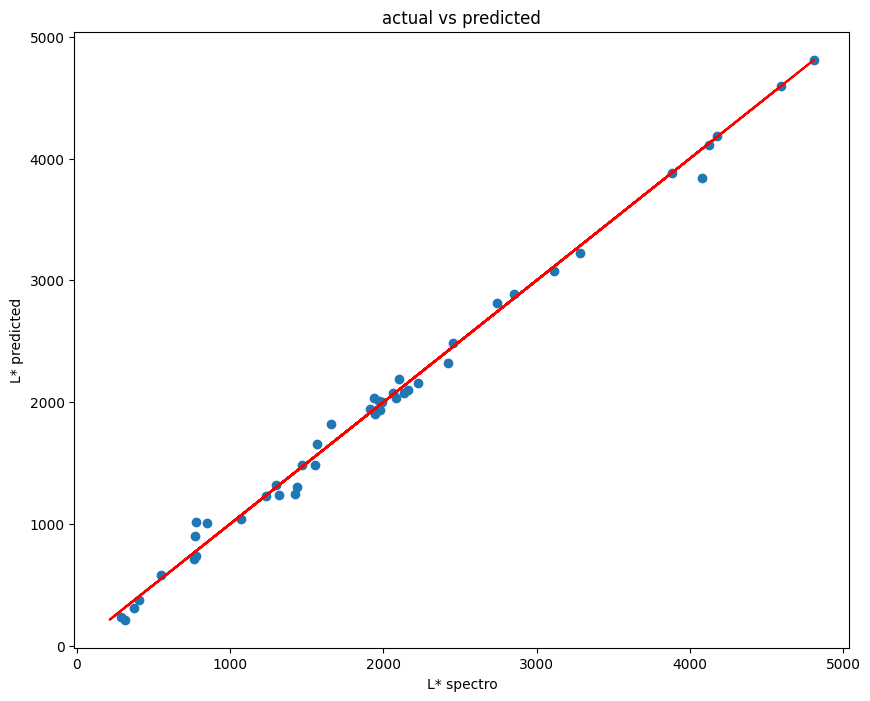

In [162]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
plt.scatter(y_test,y_pred)
plt.plot(y_pred, y_pred, color = 'red')
plt.xlabel('L* spectro')
plt.ylabel('L* predicted')
plt.title('actual vs predicted')

# DecisionTreeRegressor

In [105]:
from sklearn import tree
model = tree.DecisionTreeRegressor()
model.fit(x_train,y_train)

DecisionTreeRegressor()

In [106]:
y_pred=model.predict(x_test)

In [107]:
from sklearn.metrics import r2_score, mean_squared_error
print(mean_squared_error(y_test,y_pred,squared=True),r2_score(y_test,y_pred))

233224.90909090912 0.6935715456919319


Text(0.5, 1.0, 'actual vs predicted')

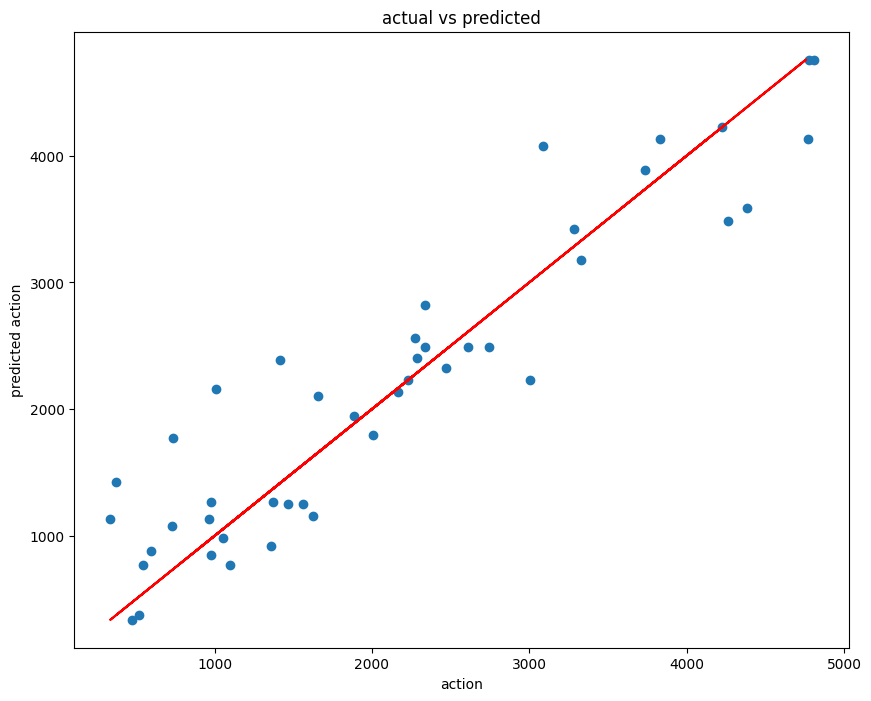

In [108]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
plt.scatter(y_test,y_pred)
plt.plot(y_pred, y_pred, color = 'red')
plt.xlabel('action')
plt.ylabel('predicted action')
plt.title('actual vs predicted')

# Gradient Boosting Regressor

In [55]:
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor(n_estimators=400)
model.fit(x_train ,y_train)

ValueError: y should be a 1d array, got an array of shape (85, 2) instead.

In [109]:
y_pred=model.predict(x_test)

In [110]:
from sklearn.metrics import r2_score, mean_squared_error
print(mean_squared_error(y_test,y_pred,squared=True),r2_score(y_test,y_pred))

233224.90909090912 0.6935715456919319


Text(0.5, 1.0, 'actual vs predicted')

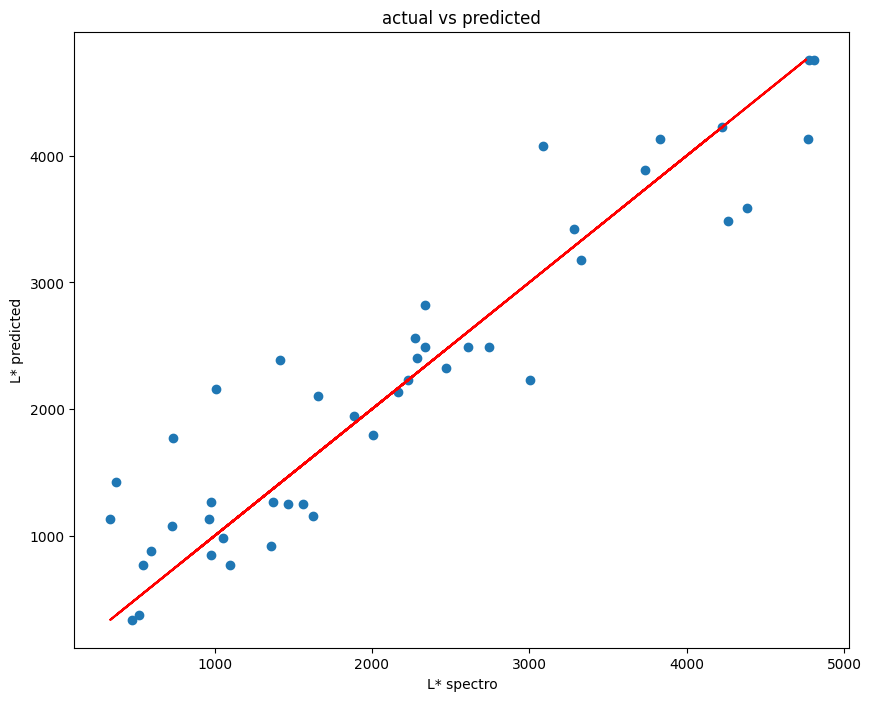

In [111]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
plt.scatter(y_test,y_pred)
plt.plot(y_pred, y_pred, color = 'red')
plt.xlabel('L* spectro')
plt.ylabel('L* predicted')
plt.title('actual vs predicted')

# Random forest

In [112]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100)
model.fit(x_train,y_train)

RandomForestRegressor()

In [113]:
y_pred=model.predict(x_test)

In [114]:
from sklearn.metrics import r2_score, mean_squared_error
print(mean_squared_error(y_test,y_pred,squared=True),r2_score(y_test,y_pred))

141163.73314318183 0.8603739371866128


Text(0.5, 1.0, 'actual vs predicted')

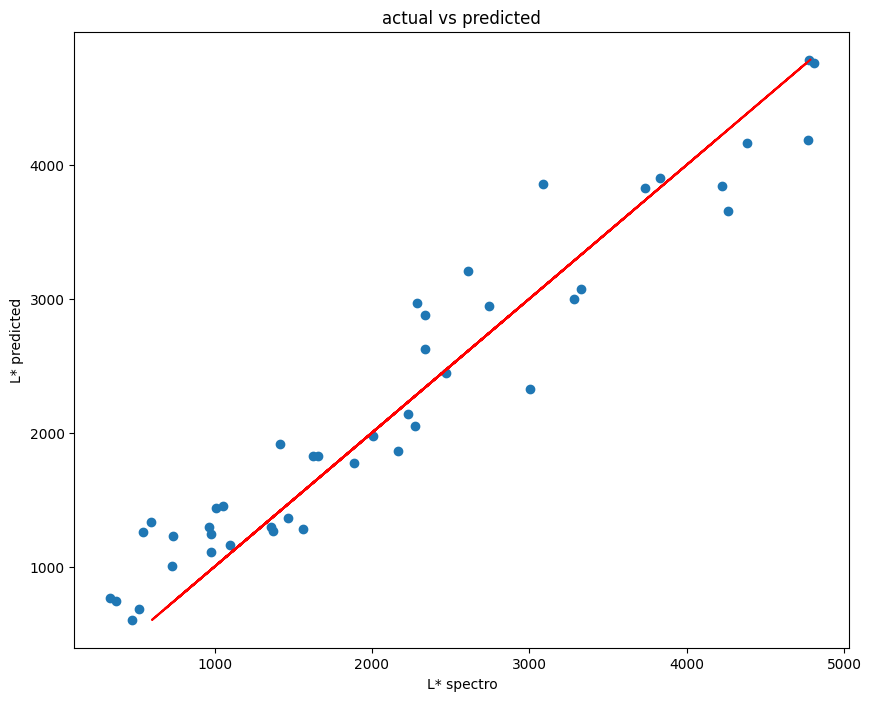

In [115]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
plt.scatter(y_test,y_pred)
plt.plot(y_pred, y_pred, color = 'red')
plt.xlabel('L* spectro')
plt.ylabel('L* predicted')
plt.title('actual vs predicted')

# SVM

In [116]:
from sklearn import svm
model = svm.SVR()
model.fit(x_train, y_train.values.ravel())

ValueError: Found input variables with inconsistent numbers of samples: [85, 170]

In [358]:
y_pred=model.predict(x_test)

In [359]:
from sklearn.metrics import r2_score, mean_squared_error
print(mean_squared_error(y_test,y_pred,squared=True),r2_score(y_test,y_pred))

563379.1221670393 -0.252285112390084


Text(0.5, 1.0, 'actual vs predicted')

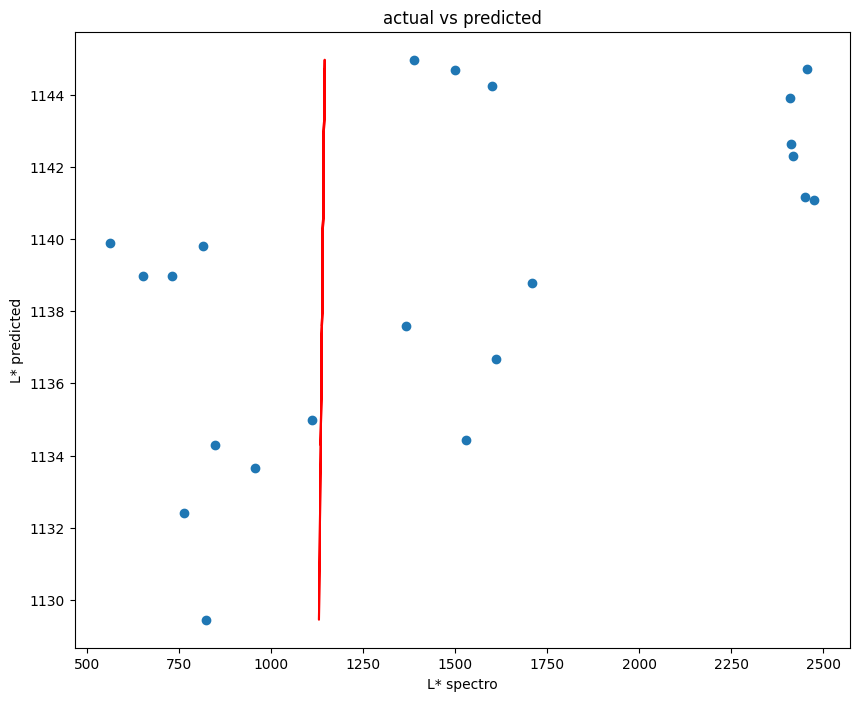

In [360]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
plt.scatter(y_test,y_pred)
plt.plot(y_pred, y_pred, color = 'red')
plt.xlabel('L* spectro')
plt.ylabel('L* predicted')
plt.title('actual vs predicted')

# KRR

In [117]:
from sklearn.kernel_ridge import KernelRidge
model = KernelRidge(alpha=1.0)
model.fit(x_train, y_train)
y_pred=model.predict(x_test)

In [118]:
from sklearn.metrics import r2_score, mean_squared_error
print(mean_squared_error(y_test,y_pred,squared=True),r2_score(y_test,y_pred))

102323.0113428386 0.8895194007945664


Text(0.5, 1.0, 'actual vs predicted')

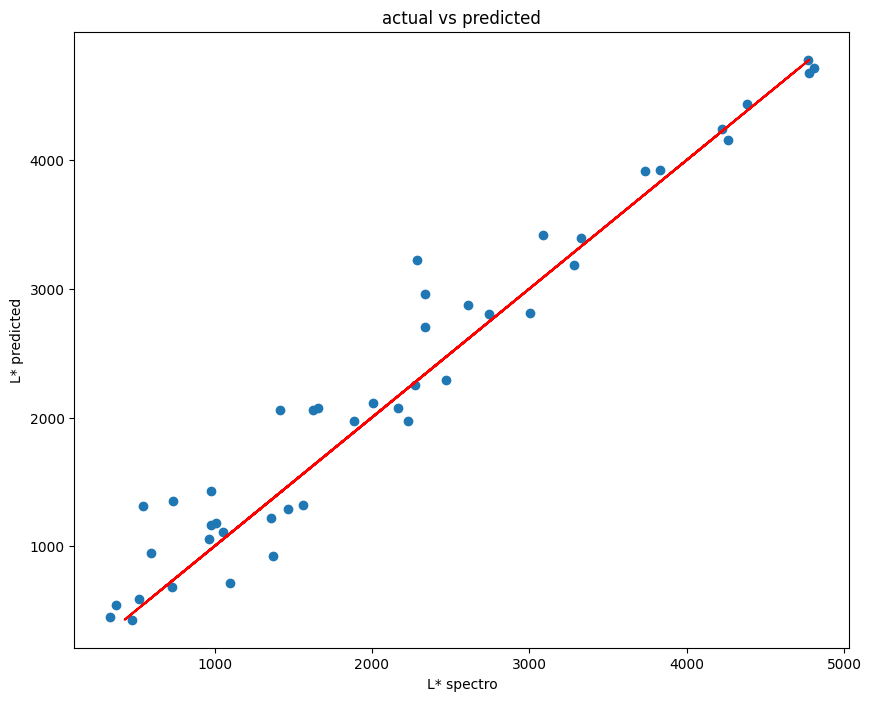

In [119]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
plt.scatter(y_test,y_pred)
plt.plot(y_pred, y_pred, color = 'red')
plt.xlabel('L* spectro')
plt.ylabel('L* predicted')
plt.title('actual vs predicted')